In [131]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import random

### README
Change Episode number variable to cycle through episodes. If you want to use the allepisodes variable to true.

In [132]:
episodeno=1
allepisodes = False
if allepisodes is not True:
    with open('star_wars_dataset/starwars-episode-%i-interactions-allCharacters.json' %episodeno) as f:
        js_graph1 = json.load(f)
        js_graph = nx.json_graph.node_link_graph(js_graph1)
        nx.write_graphml(js_graph, "./episode_%i.graphml" %episodeno)
else:
    with open('star_wars_dataset/starwars-full-interactions-allCharacters.json') as f:
        js_graph1 = json.load(f)
        js_graph = nx.json_graph.node_link_graph(js_graph1)
        nx.write_graphml(js_graph, "./all_episodes.graphml")

idToName = {}
cy = nx.json_graph.cytoscape_data(js_graph)
for i in cy["elements"]["nodes"]:
    idToName[int(i['data']['id'])]=  i['data']['name']

In [133]:
#list_neighbors=js_graph.neighbors(11)
#sums = statistics.median([i[2] for i in list(js_graph.edges(2,'value'))])
#print(sums)
#closeconnections = []
#for i in list(js_graph.edges(2,'value')):
#    if i[2]>sums:
#        closeconnections.append(idToName[str(i[1])])
#        print(idToName[str(i[1])])

## Task 3
Finding the correlation coefficient and shortest avg path within each episode. Change episodeno variable to cycle through episodes

In [134]:
js_digraph = nx.DiGraph(js_graph)
nx.average_clustering(js_digraph)

0.7115745908120388

In [135]:
Gcc = sorted(nx.connected_components(js_graph), key=len, reverse=True)
G0 = js_graph.subgraph(Gcc[0])
nx.average_shortest_path_length(G0)

2.1052631578947367

Generating random graph based on Episode 1.
Deleting an edge with probability 0.2 and adding an edge with probability 0.2

Number of characters : 38
Number of edges : 135
Random Graph 1 No of Edges: 142
Random Graph No of Edges: 270
Average clustering coefficient random graph 1: 0.700630
Average shortest path length random graph 1: 2.122333
Average clustering coefficient random graph 2: 0.235794
Average shortest path length random graph 2: 2.011380


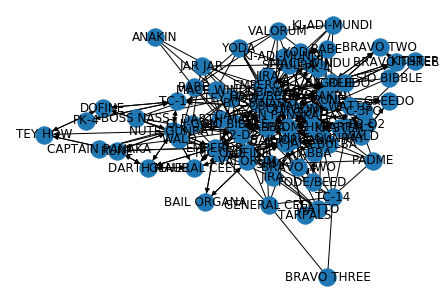

In [136]:
print("Number of characters : %i" %(len(js_graph.nodes())))
print("Number of edges : %i" %(len(js_graph.edges())))

random_graph_1 = nx.fast_gnp_random_graph(38, 0.2)
print("Random Graph 1 No of Edges: %i" %len(random_graph_1.edges()))
nx.draw(random_graph_1 , labels = idToName )

random_graph = nx.DiGraph(js_graph)
prob_e = [0.2] * len(random_graph.edges())
prob_ne = [0.2] * len(list(nx.non_edges(random_graph)))

edges = list(random_graph.edges())
nonedges = list(nx.non_edges(random_graph))

# random edge choice
chosen_edge = random.choices(edges, weights = prob_e, k= 15)
#print(chosen_edge)
#print(prob_ne)
chosen_nonedge = random.choices(nonedges, weights = prob_ne, k = 15)

del_orig = True
if del_orig:
    # delete chosen edge
    random_graph.remove_edge(chosen_edge[0][0], chosen_edge[0][1])
# add new edge
random_graph.add_edge(chosen_nonedge[0][0], chosen_nonedge[0][1])

print("Random Graph No of Edges: %i" %len(random_graph.edges()))
nx.draw(random_graph , labels = idToName )

print("Average clustering coefficient random graph 1: %f" % nx.average_clustering(random_graph))
print("Average shortest path length random graph 1: %f" % nx.average_shortest_path_length(random_graph))

print("Average clustering coefficient random graph 2: %f" % nx.average_clustering(random_graph_1))
print("Average shortest path length random graph 2: %f" % nx.average_shortest_path_length(random_graph_1))

## Task 4
Finding the weak ties within each episode. Change episodeno variable to cycle through episodes

In [137]:
#list_neighbors=js_graph.neighbors(11)
sums = statistics.median([i[2] for i in list(js_graph.edges.data('value'))])
print(sums)
closeconnections = []
for i in list(js_graph.edges.data('value')):
    if i[2]<sums:
        closeconnections.append(idToName[(i[1])])
        print(idToName[(i[0])] +" and "+idToName[(i[1])])

2
QUI-GON and NUTE GUNRAY
QUI-GON and TC-14
QUI-GON and C-3PO
QUI-GON and JABBA
QUI-GON and GREEDO
QUI-GON and EMPEROR
QUI-GON and VALORUM
QUI-GON and RABE
NUTE GUNRAY and TC-14
NUTE GUNRAY and DOFINE
NUTE GUNRAY and TEY HOW
NUTE GUNRAY and GENERAL CEEL
NUTE GUNRAY and PADME
PK-4 and TC-14
TC-14 and OBI-WAN
TC-14 and DOFINE
OBI-WAN and SIO BIBBLE
OBI-WAN and SHMI
OBI-WAN and KI-ADI-MUNDI
OBI-WAN and PADME
DOFINE and TEY HOW
RUNE and DARTH MAUL
EMPEROR and SIO BIBBLE
EMPEROR and BAIL ORGANA
EMPEROR and GENERAL CEEL
EMPEROR and PADME
CAPTAIN PANAKA and BOSS NASS
SIO BIBBLE and JAR JAR
SIO BIBBLE and PADME
JAR JAR and RIC OLIE
JAR JAR and KITSTER
JAR JAR and WALD
JAR JAR and JABBA
JAR JAR and VALORUM
JAR JAR and GENERAL CEEL
BOSS NASS and ANAKIN
PADME and JIRA
PADME and KITSTER
PADME and JABBA
PADME and FODE/BEED
WATTO and C-3PO
WATTO and KITSTER
ANAKIN and JABBA
ANAKIN and GREEDO
ANAKIN and RABE
ANAKIN and BRAVO THREE
SEBULBA and SHMI
SEBULBA and JABBA
SHMI and JABBA
SHMI and KITSTER
C-3